<a href="https://colab.research.google.com/github/Radhikakhot66-VCTI/Python_libraries/blob/Pavan/readingGeoJSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import geopandas as gpd
import fiona
from shapely.geometry import shape


def read_geojson_safe(path):
    with fiona.open(path) as src:
        crs = src.crs
        features = list(src)
    records = []
    for f in features:
        geom = shape(f['geometry'])
        props = f['properties']
        props['geometry'] = geom
        records.append(props)
    return gpd.GeoDataFrame(records, crs=crs)


In [7]:
soil_path = "/content/drive/MyDrive/Colab Notebooks/soil_data_be 1.geojson"
network_path = "/content/drive/MyDrive/Colab Notebooks/VCTI_abc_network 5.geojson"

soil_gdf = read_geojson_safe(soil_path)
network_gdf = read_geojson_safe(network_path)


/tmp/ipython-input-6-3227285319.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom
/tmp/ipython-input-6-3227285319.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom
/tmp/ipython-input-6-3227285319.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom
/tmp/ipython-input-6-3227285319.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom
/tmp/ipython-input-6-3227285319.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['geometry'] = geom
/tmp/

In [8]:
print("Soil Data Sample:")
display(soil_gdf.head())

print("Network Data Sample:")
display(network_gdf.head())


🟤 Soil Data Sample:


,Area,GeoIQ_ID,area_cod,bot_dep,category,countyfp,extr_dt,final_hard,geometry,hard_class,...,spm_gname,spm_kind,spm_mod,spm_orig,spmg_mod,state,stcnt_name,top_dep,tx_def,w_ptex_vol
0,2.489184e+06,PA095_409,PA095,12,Depth,42095,2024-09-05T00:22:59+00:00,2,"MULTIPOLYGON (((-75.42785 40.73499, -75.42741 ...",Hardness 2,...,Acid Residuum Weathered From Shale And Siltstone,Residuum,NULL,"Shale,Siltstone",Acid,PA,"Northampton County, Pennsylvania",0,Channery Silt Loam,30.86
1,2.489184e+06,PA095_410,PA095,24,Depth,42095,2024-09-05T00:22:59+00:00,2,"MULTIPOLYGON (((-75.42785 40.73499, -75.42741 ...",Hardness 2,...,Acid Residuum Weathered From Shale And Siltstone,Residuum,NULL,"Shale,Siltstone",Acid,PA,"Northampton County, Pennsylvania",12,Channery Silt Loam,34.00
2,2.489184e+06,PA095_411,PA095,36,Depth,42095,2024-09-05T00:22:59+00:00,2,"MULTIPOLYGON (((-75.42785 40.73499, -75.42741 ...",Hardness 2,...,Acid Residuum Weathered From Shale And Siltstone,Residuum,NULL,"Shale,Siltstone",Acid,PA,"Northampton County, Pennsylvania",24,Channery Silt Loam,34.00
3,2.489184e+06,PA095_412,PA095,48,Depth,42095,2024-09-05T00:22:59+00:00,5,"MULTIPOLYGON (((-75.42785 40.73499, -75.42741 ...",Hardness 5,...,Acid Residuum Weathered From Shale And Siltstone,Residuum,NULL,"Shale,Siltstone",Acid,PA,"Northampton County, Pennsylvania",36,Channery Silt Loam,57.14
4,8.895847e+06,PA095_416,PA095,12,Depth,42095,2024-09-05T00:22:59+00:00,2,"MULTIPOLYGON (((-75.54966 40.72956, -75.55072 ...",Hardness 2,...,Acid Brown Residuum Weathered From Shale And S...,Residuum,NULL,"Shale,Siltstone",Acid Brown,PA,"Northampton County, Pennsylvania",0,Channery Silt Loam,30.86


🌐 Network Data Sample:


,geometry,icon,id,name,stroke,stroke-opacity,stroke-width,styleHash,styleMapHash,styleUrl
0,"LINESTRING (-74.85406 40.54956, -74.85514 40.5...",http://maps.google.com/mapfiles/kml/pushpin/yl...,16,SR-S19-Bore,#0000ff,1,4,641b3642,"{'normal': '#sn_ylw-pushpin0140', 'highlight':...",#msn_ylw-pushpin3730
1,"LINESTRING (-74.85315 40.55043, -74.85406 40.5...",http://maps.google.com/mapfiles/kml/pushpin/yl...,15,SR-S18-RR,#0000ff,1,4,641b3642,"{'normal': '#sn_ylw-pushpin0140', 'highlight':...",#msn_ylw-pushpin3730
2,"LINESTRING (-74.85225 40.55137, -74.85317 40.5...",http://maps.google.com/mapfiles/kml/pushpin/yl...,14,SR-S17-Water,#0000ff,1,4,641b3642,"{'normal': '#sn_ylw-pushpin0140', 'highlight':...",#msn_ylw-pushpin3730
3,"LINESTRING (-74.90736 40.6336, -74.90674 40.63...",http://maps.google.com/mapfiles/kml/pushpin/yl...,13,SR-S16-Bore,#0000ff,1,4,641b3642,"{'normal': '#sn_ylw-pushpin0140', 'highlight':...",#msn_ylw-pushpin3730
4,"LINESTRING (-74.9079 40.6342, -74.90736 40.63359)",http://maps.google.com/mapfiles/kml/pushpin/yl...,12,SR-S15-HW,#0000ff,1,4,641b3642,"{'normal': '#sn_ylw-pushpin0140', 'highlight':...",#msn_ylw-pushpin3730


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['stroke-opacity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'stroke-opacity'}, axis=1)
              .sort_values('stroke-opacity', ascending=True))
  xs = counted['stroke-opacity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('stroke-opacity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stroke-opacity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['stroke-opacity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'stroke-opacity'}, axis=1)
              .sort_values('stroke-opacity', ascending=True))
  xs = counted['stroke-opacity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('stroke-opacity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stroke-opacity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['stroke-width']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'stroke-width'}, axis=1)
              .sort_values('stroke-width', ascending=True))
  xs = counted['stroke-width']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('stroke-width', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stroke-width')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['stroke-width']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'stroke-width'}, axis=1)
              .sort_values('stroke-width', ascending=True))
  xs = counted['stroke-width']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('stroke-width', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stroke-width')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['name'].value_counts()
    for x_label, grp in _df_6.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('name')

/tmp/ipython-input-10-3316874340.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


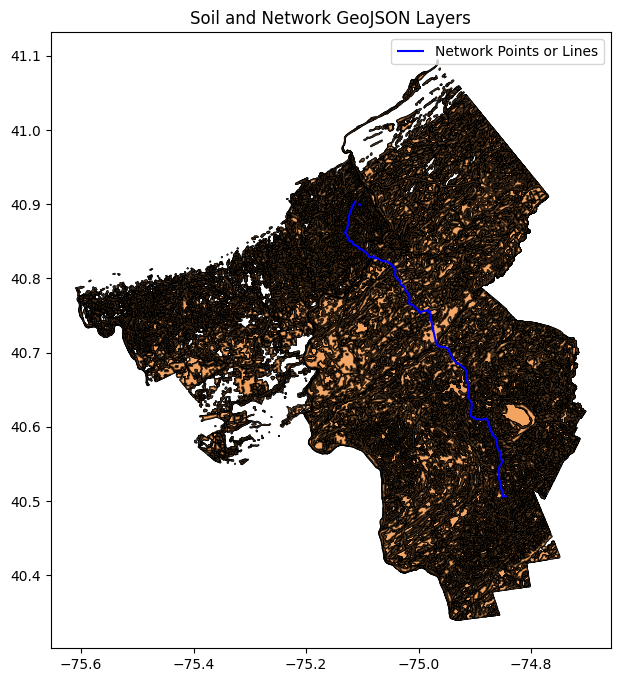

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
soil_gdf.plot(ax=ax, color="sandybrown", alpha=0.5, edgecolor='black', label="Soil Layer")
network_gdf.plot(ax=ax, color="blue", markersize=10, label="Network Points or Lines")
plt.legend()
plt.title("Soil and Network GeoJSON Layers")
plt.show()
